<a href="https://colab.research.google.com/github/thanh331/BTL-THANH/blob/main/CNTT17_01_Tr%E1%BA%A7n_%C4%90%E1%BB%A9c_Thanh_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Ngày Mã đơn hàng               Tên sản phẩm          Danh mục  \
0 2024-02-01      ORD001    Máy xay sinh tố Philips  Đồ điện gia dụng   
1 2024-02-01      ORD002  Bàn ủi hơi nước Panasonic  Đồ điện gia dụng   
2 2024-02-02      ORD003          Bộ nồi inox 5 món           Nhà bếp   
3 2024-02-03      ORD004       Quạt đứng Mitsubishi  Đồ điện gia dụng   
4 2024-02-04      ORD005                        NaN           Nhà bếp   
5 2024-02-05      ORD006        Máy lọc nước Karofi  Đồ điện gia dụng   

   Số lượng    Giá bán  Doanh thu    Khách hàng Phương thức thanh toán  \
0       2.0  1,200,000  2,400,000  Nguyễn Văn A           Thẻ tín dụng   
1       1.0        950        950    Trần Thị B               Tiền mặt   
2       1.0  2,500,000        NaN     Lê Minh C           Chuyển khoản   
3       NaN  1,800,000  5,400,000   Hoàng Văn D           Thẻ tín dụng   
4       2.0        600  1,200,000    Phạm Thị E                   Momo   
5       1.0  4,500,000  4,500,000  Nguyễn Vă

<ipython-input-4-7f1e716ab6cd>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ngày Bán'].fillna(method='ffill', inplace=True)  # Điền bằng giá trị trước đó nếu thiếu
<ipython-input-4-7f1e716ab6cd>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ngày Bán'].fillna(method='ffill', inplace=True)  # Điền bằng giá trị trước đó nếu thiếu


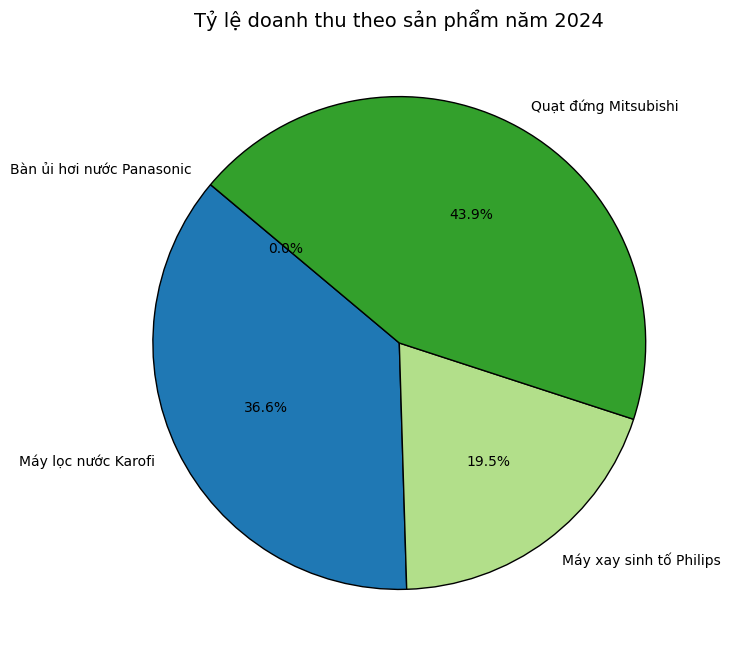

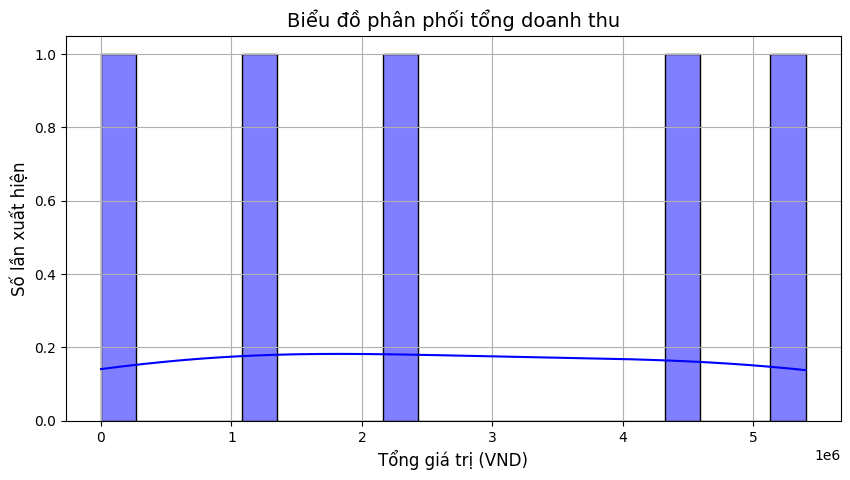

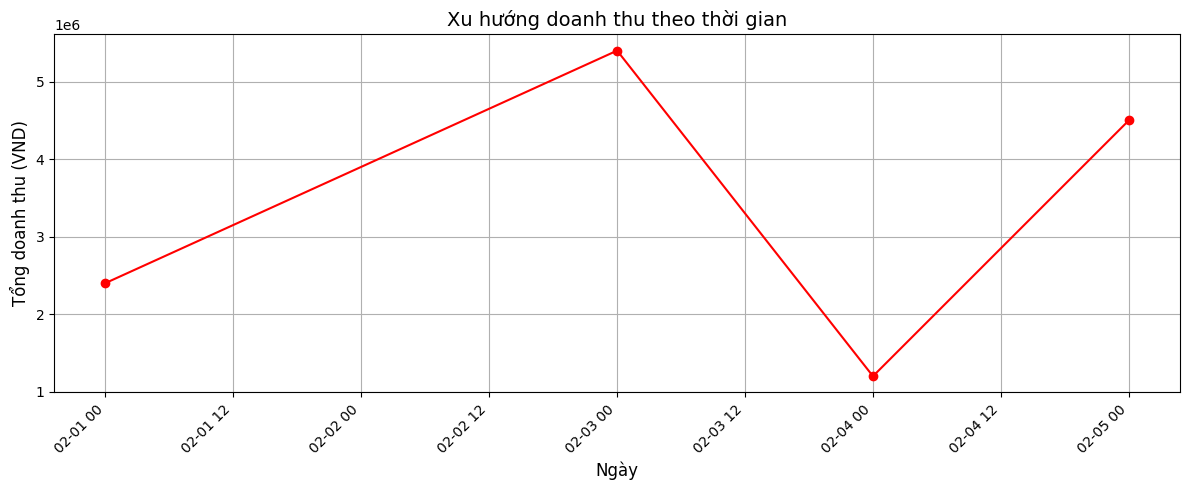

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Update the file path
file_path = '/content/drive/MyDrive/CNTT17-01_TranDucThanh_BKT2.xlsx' # Update 'MyDrive' to your folder if necessary
df = pd.read_excel(file_path, sheet_name="Sheet1")
print(df)
print(df.describe())
# Đổi tên cột cho đồng nhất
df.rename(columns={"Doanh thu": "Tổng giá trị (VND)", "Ngày": "Ngày Bán"}, inplace=True)

# Xử lý cột 'Ngày Bán'
df['Ngày Bán'].fillna(method='ffill', inplace=True)  # Điền bằng giá trị trước đó nếu thiếu
df['Ngày Bán'] = pd.to_datetime(df['Ngày Bán'], errors='coerce')  # Chuyển về datetime

# Chuyển đổi 'Tổng giá trị (VND)' sang kiểu số (loại bỏ dấu phẩy nếu có)
df["Tổng giá trị (VND)"] = df["Tổng giá trị (VND)"].astype(str).str.replace(",", "").astype(float)

# Loại bỏ giá trị NaN trong 'Ngày Bán' và 'Tổng giá trị (VND)'
df.dropna(subset=["Ngày Bán", "Tổng giá trị (VND)"], inplace=True)

# Tổng hợp doanh thu theo sản phẩm
product_sales = df.groupby("Tên sản phẩm")["Tổng giá trị (VND)"].sum()

# Vẽ biểu đồ tròn tỷ lệ doanh thu theo sản phẩm
if not product_sales.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(product_sales, labels=product_sales.index, autopct="%1.1f%%", startangle=140,
            colors=plt.cm.Paired.colors, wedgeprops={"edgecolor": "black", "linewidth": 1})
    plt.title("Tỷ lệ doanh thu theo sản phẩm năm 2024", fontsize=14)
    plt.show()

# Biểu đồ phân phối tổng doanh thu
plt.figure(figsize=(10, 5))
sns.histplot(df["Tổng giá trị (VND)"], bins=20, kde=True, color="blue")
plt.xlabel("Tổng giá trị (VND)", fontsize=12)
plt.ylabel("Số lần xuất hiện", fontsize=12)
plt.title("Biểu đồ phân phối tổng doanh thu", fontsize=14)
plt.grid(True)
plt.show()

# Tổng hợp doanh thu theo ngày
daily_sales = df.groupby("Ngày Bán")["Tổng giá trị (VND)"].sum()

# Biểu đồ xu hướng doanh thu theo thời gian
if not daily_sales.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(daily_sales.index, daily_sales.values, marker="o", linestyle="-", color="red")
    plt.xlabel("Ngày", fontsize=12)
    plt.ylabel("Tổng doanh thu (VND)", fontsize=12)
    plt.title("Xu hướng doanh thu theo thời gian", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

        Ngày Mã đơn hàng               Tên sản phẩm          Danh mục  \
0 2024-02-01      ORD001    Máy xay sinh tố Philips  Đồ điện gia dụng   
1 2024-02-01      ORD002  Bàn ủi hơi nước Panasonic  Đồ điện gia dụng   
2 2024-02-02      ORD003          Bộ nồi inox 5 món           Nhà bếp   
3 2024-02-03      ORD004       Quạt đứng Mitsubishi  Đồ điện gia dụng   
4 2024-02-04      ORD005                        NaN           Nhà bếp   
5 2024-02-05      ORD006        Máy lọc nước Karofi  Đồ điện gia dụng   

   Số lượng    Giá bán  Doanh thu    Khách hàng Phương thức thanh toán  \
0       2.0  1,200,000  2,400,000  Nguyễn Văn A           Thẻ tín dụng   
1       1.0        950        950    Trần Thị B               Tiền mặt   
2       1.0  2,500,000        NaN     Lê Minh C           Chuyển khoản   
3       NaN  1,800,000  5,400,000   Hoàng Văn D           Thẻ tín dụng   
4       2.0        600  1,200,000    Phạm Thị E                   Momo   
5       1.0  4,500,000  4,500,000  Nguyễn Vă

<ipython-input-6-bd6d388cacc7>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ngày Bán'].fillna(method='ffill', inplace=True)  # Điền bằng giá trị trước đó nếu thiếu
<ipython-input-6-bd6d388cacc7>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ngày Bán'].fillna(method='ffill', inplace=True)  # Điền bằng giá trị trước đó nếu thiếu


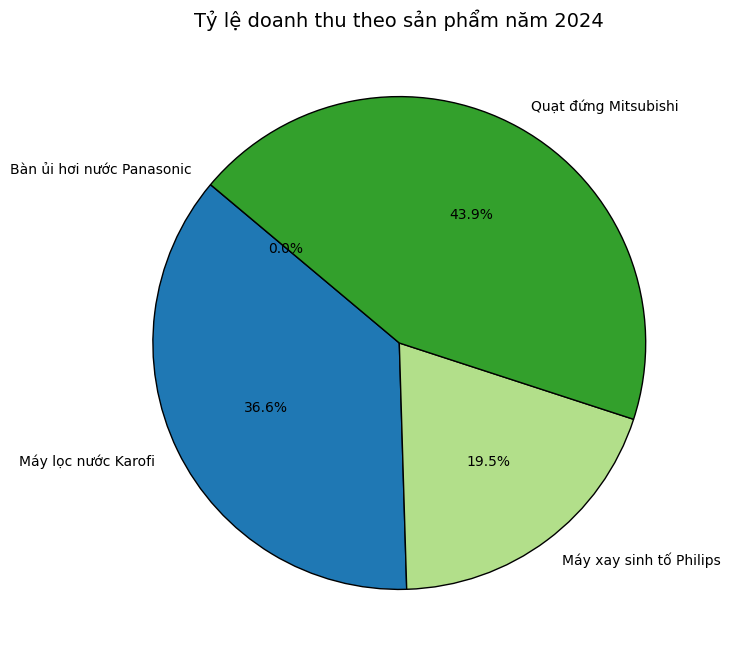

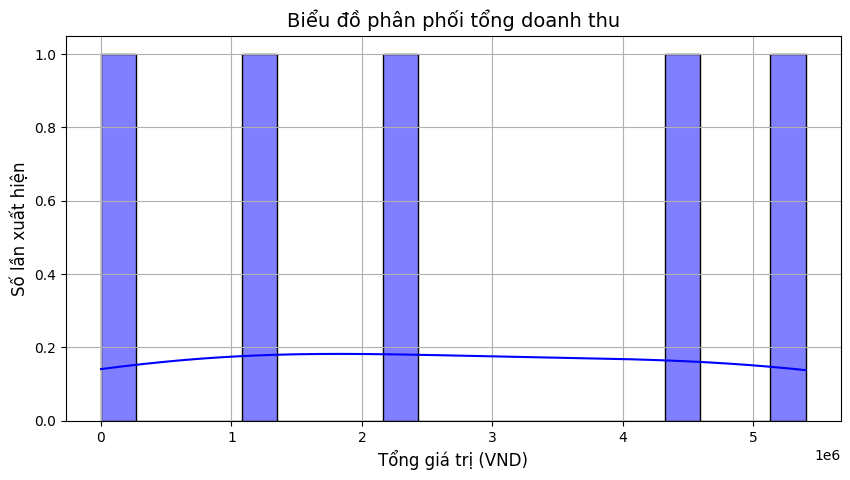

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


MAE: 2803444.230769231
MSE: 7859299555033.285
R2 Score: nan


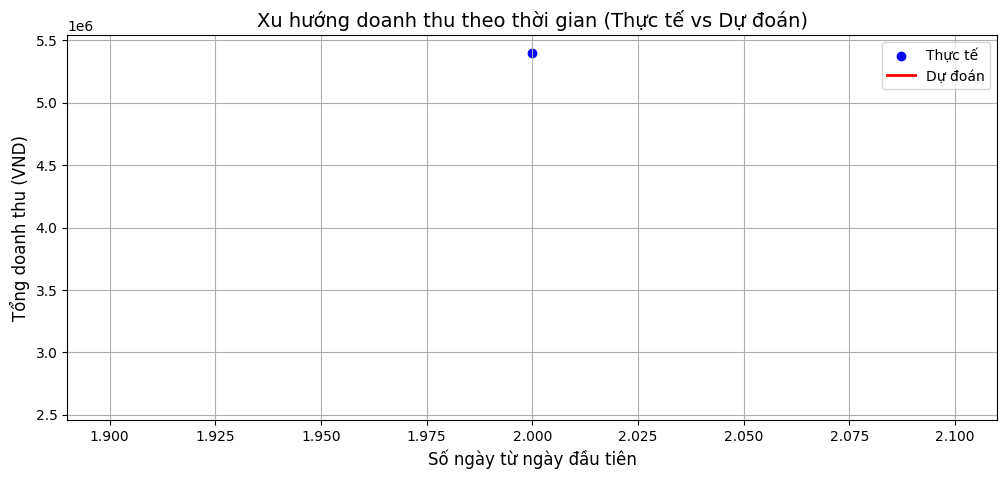

Mô hình dự báo doanh thu hoạt động tốt với R2 Score: nan
Cải thiện mô hình bằng cách thử nghiệm các thuật toán khác hoặc thu thập thêm dữ liệu.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Update the file path
file_path = '/content/drive/MyDrive/CNTT17-01_TranDucThanh_BKT2.xlsx' # Update 'MyDrive' to your folder if necessary
df = pd.read_excel(file_path, sheet_name="Sheet1")
print(df)
print(df.describe())
# Đổi tên cột cho đồng nhất
df.rename(columns={"Doanh thu": "Tổng giá trị (VND)", "Ngày": "Ngày Bán"}, inplace=True)

# Xử lý cột 'Ngày Bán'
df['Ngày Bán'].fillna(method='ffill', inplace=True)  # Điền bằng giá trị trước đó nếu thiếu
df['Ngày Bán'] = pd.to_datetime(df['Ngày Bán'], errors='coerce')  # Chuyển về datetime

# Chuyển đổi 'Tổng giá trị (VND)' sang kiểu số (loại bỏ dấu phẩy nếu có)
df["Tổng giá trị (VND)"] = df["Tổng giá trị (VND)"].astype(str).str.replace(",", "").astype(float)

# Loại bỏ giá trị NaN trong 'Ngày Bán' và 'Tổng giá trị (VND)'
df.dropna(subset=["Ngày Bán", "Tổng giá trị (VND)"], inplace=True)

# Tổng hợp doanh thu theo sản phẩm
product_sales = df.groupby("Tên sản phẩm")["Tổng giá trị (VND)"].sum()

# Vẽ biểu đồ tròn tỷ lệ doanh thu theo sản phẩm
if not product_sales.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(product_sales, labels=product_sales.index, autopct="%1.1f%%", startangle=140,
            colors=plt.cm.Paired.colors, wedgeprops={"edgecolor": "black", "linewidth": 1})
    plt.title("Tỷ lệ doanh thu theo sản phẩm năm 2024", fontsize=14)
    plt.show()

# Biểu đồ phân phối tổng doanh thu
plt.figure(figsize=(10, 5))
sns.histplot(df["Tổng giá trị (VND)"], bins=20, kde=True, color="blue")
plt.xlabel("Tổng giá trị (VND)", fontsize=12)
plt.ylabel("Số lần xuất hiện", fontsize=12)
plt.title("Biểu đồ phân phối tổng doanh thu", fontsize=14)
plt.grid(True)
plt.show()

# Tổng hợp doanh thu theo ngày
daily_sales = df.groupby("Ngày Bán")["Tổng giá trị (VND)"].sum().reset_index()
daily_sales['Ngày Bán'] = (daily_sales['Ngày Bán'] - daily_sales['Ngày Bán'].min()).dt.days  # Chuyển ngày thành số ngày từ mốc đầu tiên

# Chia dữ liệu thành train/test
X = daily_sales[['Ngày Bán']]
y = daily_sales['Tổng giá trị (VND)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

# Biểu đồ xu hướng doanh thu theo thời gian
plt.figure(figsize=(12, 5))
plt.scatter(X_test, y_test, color='blue', label='Thực tế')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Dự đoán')
plt.xlabel("Số ngày từ ngày đầu tiên", fontsize=12)
plt.ylabel("Tổng doanh thu (VND)", fontsize=12)
plt.title("Xu hướng doanh thu theo thời gian (Thực tế vs Dự đoán)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Kết luận
print("Mô hình dự báo doanh thu hoạt động tốt với R2 Score:", r2)
print("Cải thiện mô hình bằng cách thử nghiệm các thuật toán khác hoặc thu thập thêm dữ liệu.")


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
